IMPORTING SOME LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

Loading Data

In [ ]:
df = pd.read_csv("/content/concrete_data.csv")

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.duplicated().sum()

25

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
columns = df.columns

Now see outliers

In [ ]:

def outlier_graph(column):
    plt.figure(figsize=(5,3))
    sns.boxplot(df[column])
    plt.title('{} distribution'.format(column))

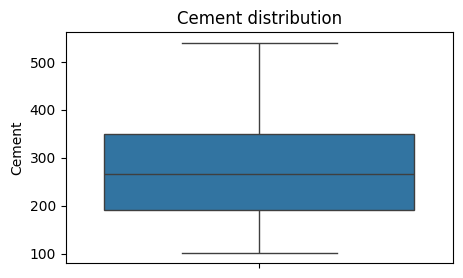

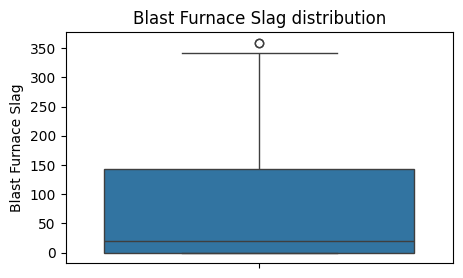

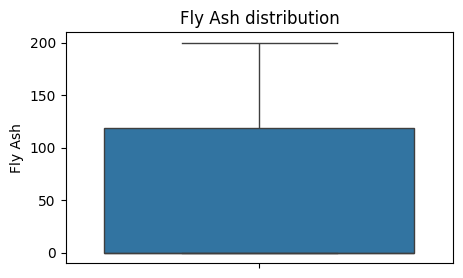

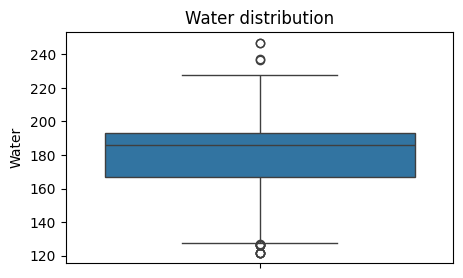

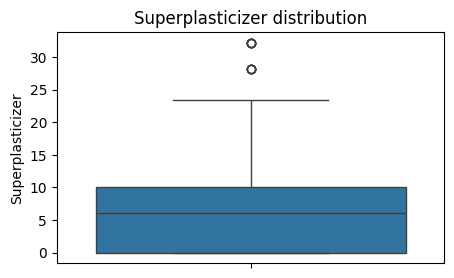

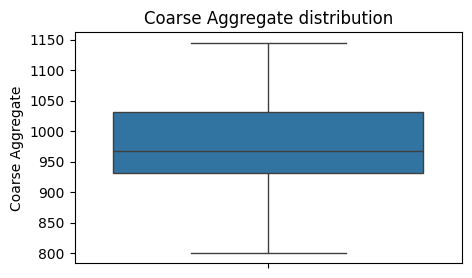

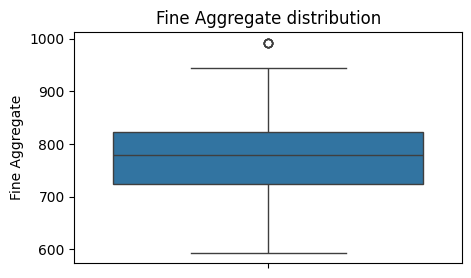

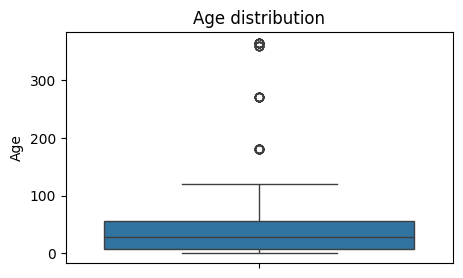

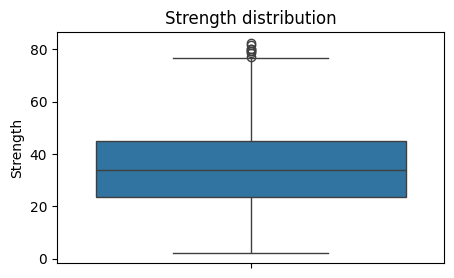

In [ ]:
for i in columns:
    outlier_graph(i)

Removing outliers involves identifying and excluding data points that significantly deviate from the majority of the dataset to improve accuracy.

In [ ]:
df = df[df['Blast Furnace Slag']<350]
df = df[(df['Water']<230) & (df['Water']>130)]
df = df[df['Superplasticizer']<25]
df = df[df['Fine Aggregate']<950]
df = df[df['Age']<100]

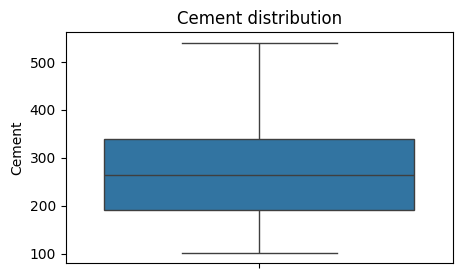

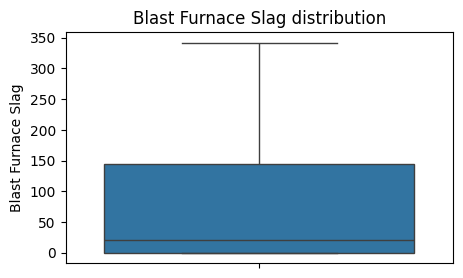

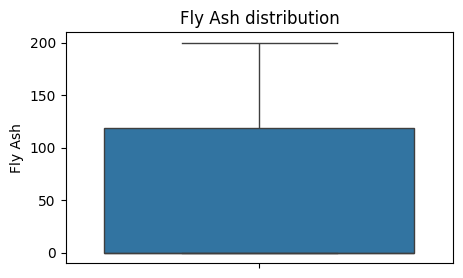

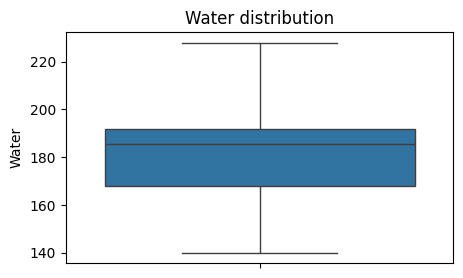

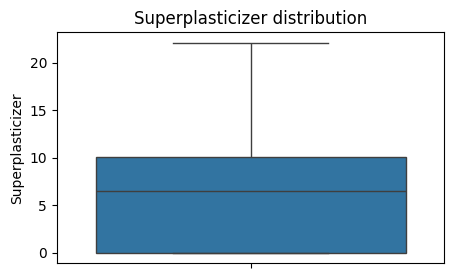

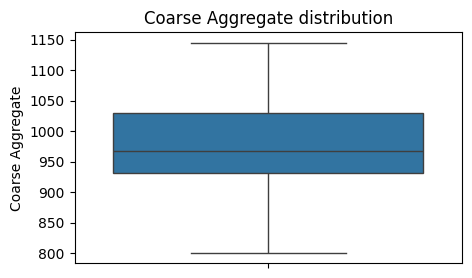

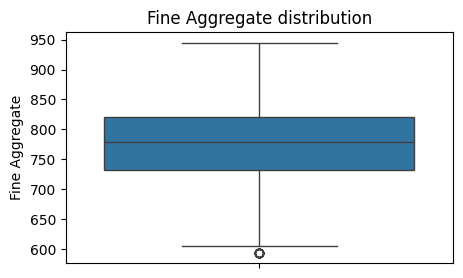

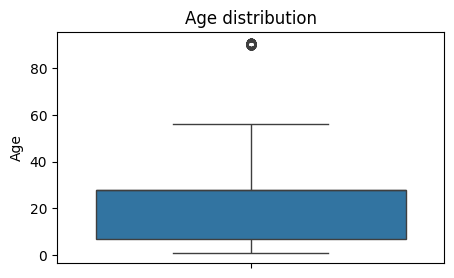

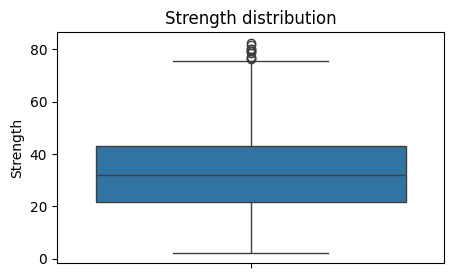

In [ ]:
for i in columns:
    outlier_graph(i)

Data Visualization

<Axes: >

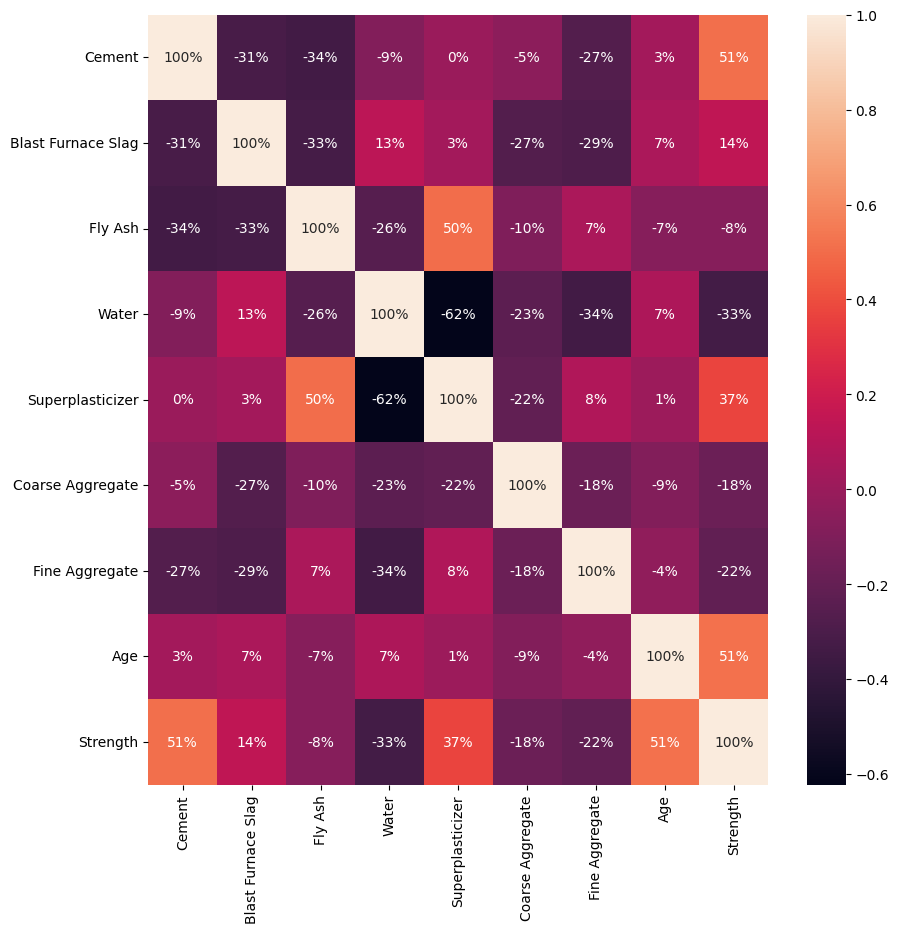

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')


Fly ash was dropped from consideration due to its very weak correlation with concrete strength.

In [ ]:
df.drop(['Fly Ash'],axis=1,inplace=True)

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,228.0,0.0,932.0,670.0,28,45.85


In [ ]:
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i,y=j,hue='Strength',data=df)
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

Separate features and target coloms

In [ ]:
x = df.drop(['Strength'],axis=1)
y = df['Strength']

Scaling the data

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaler = scaler.fit_transform(x)

In [ ]:
x_scaler_frame=pd.DataFrame(x_scaler,columns=x.columns)
x_scaler_frame.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.548622,-0.859049,-1.065371,-0.649890,0.849236,-1.278543,-0.000744
1,2.548622,-0.859049,-1.065371,-0.649890,1.040929,-1.278543,-0.000744
2,-0.097540,0.442638,2.491103,-1.116613,-0.530955,-1.357582,2.654687
3,1.003418,0.225690,2.491103,-1.116613,-0.530955,-2.358750,-0.000744
4,-0.097540,0.442638,2.491103,-1.116613,-0.530955,-1.357582,-0.000744


now see before scaling and after scaling our data graph

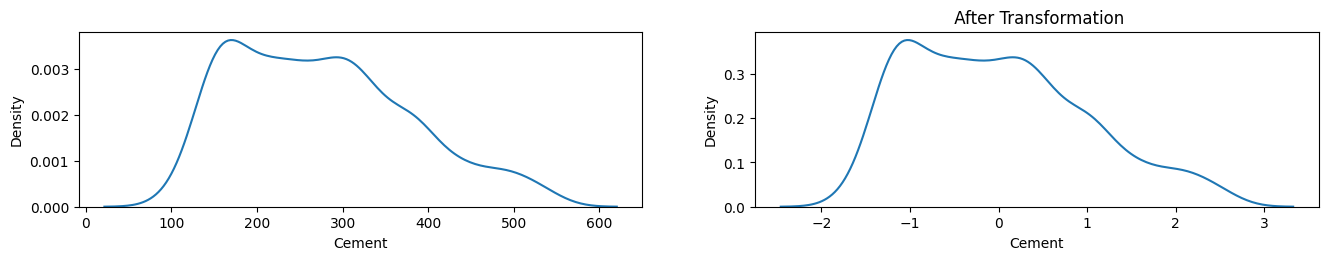

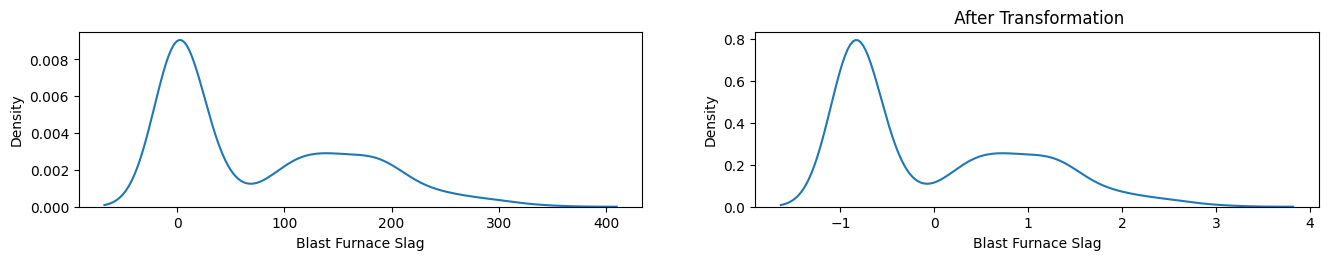

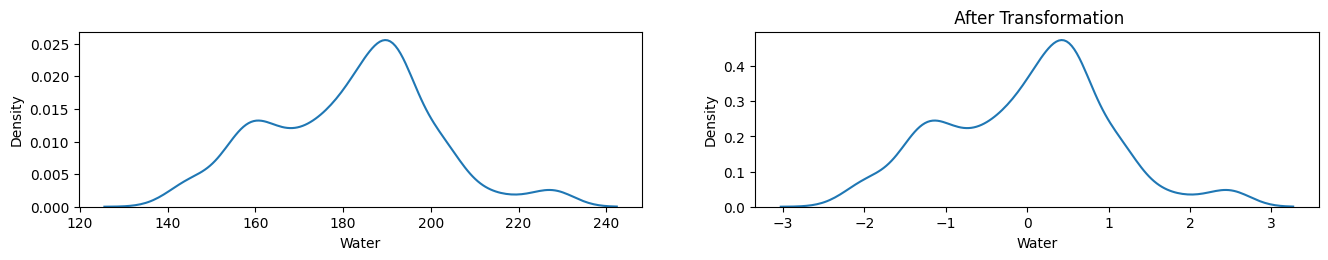

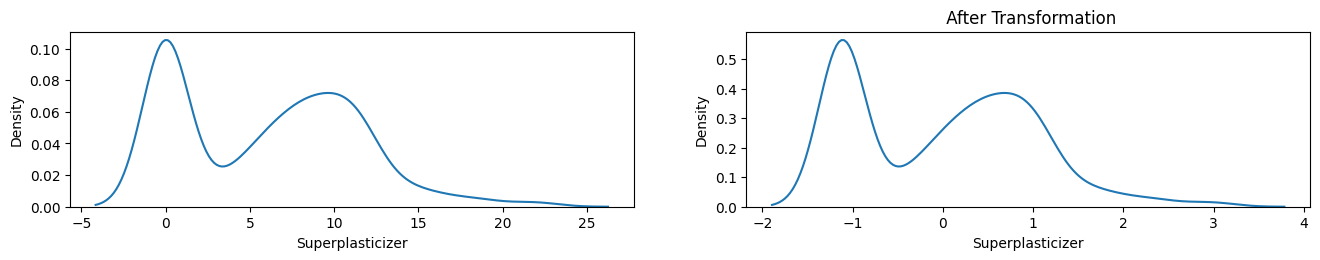

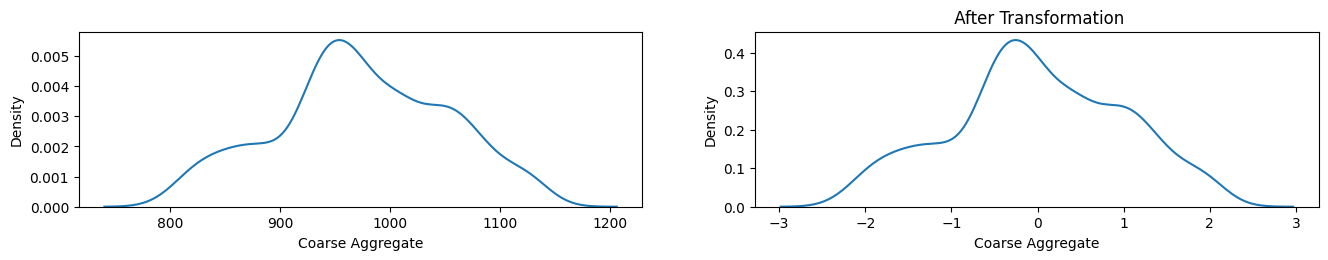

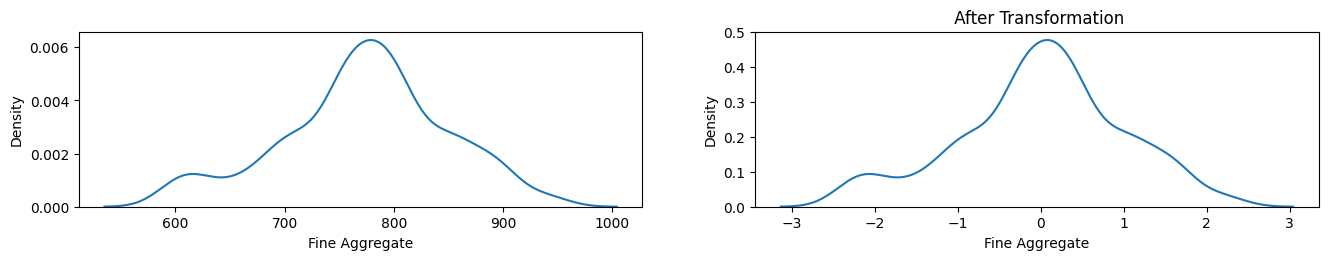

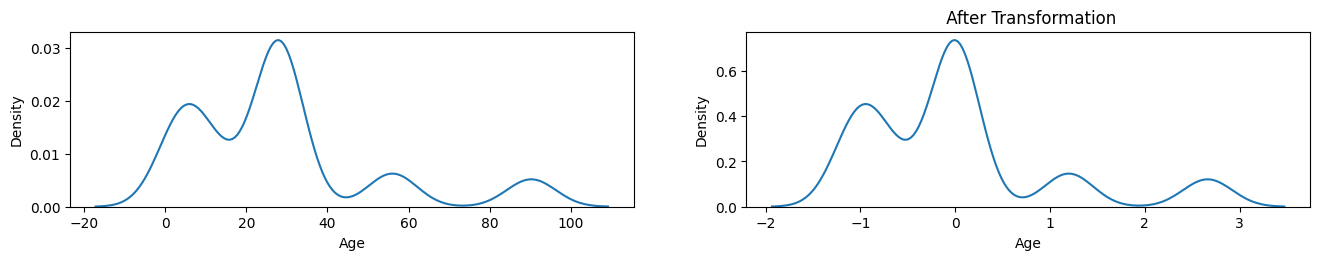

In [ ]:
for i in x.columns:
    plt.figure(figsize=(16,5))


    plt.subplot(2,2,3)
    sns.kdeplot(x=x[i])
    plt.subplot(2,2,4)
    sns.kdeplot(x=x_scaler_frame[i])
    plt.title(' After Transformation')

    plt.show( )

In [ ]:
x.skew()

Cement                0.528734
Blast Furnace Slag    0.755052
Water                 0.039502
Superplasticizer      0.369177
Coarse Aggregate     -0.063308
Fine Aggregate       -0.259392
Age                   1.356626
dtype: float64

In [ ]:
x_scaler_frame.skew()

Cement                0.528734
Blast Furnace Slag    0.755052
Water                 0.039502
Superplasticizer      0.369177
Coarse Aggregate     -0.063308
Fine Aggregate       -0.259392
Age                   1.356626
dtype: float64

The skewness values confirms that after transformation our data has become normally distributed

Preprocessing of Polynomial Features

Polynomial preprocessing is a technique used to transform input features into higher-degree polynomials, enabling models to capture nonlinear relationships in the data effectively.

In [ ]:
poly=PolynomialFeatures(degree=3)

In [ ]:
x_scaler_poly=poly.fit_transform(x_scaler)

In [ ]:
x_scaler_poly.shape

(864, 120)

Split train and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler_poly,y,test_size=0.2,random_state=42)

In [ ]:
x.shape,x_train.shape,x_test.shape

((864, 7), (691, 120), (173, 120))

Model Implementation

In [ ]:
lr=LinearRegression()
lr=lr.fit(x_train,y_train)

y_test_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

visualizations: x_test_predicted and x_test_original

<ipython-input-39-9674c03c0879>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred,label="y_test_Predicted")
<ipython-input-39-9674c03c0879>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Real")
<ipython-input-39-9674c03c0879>:7: UserWarning: 

`distplot` is a deprecate

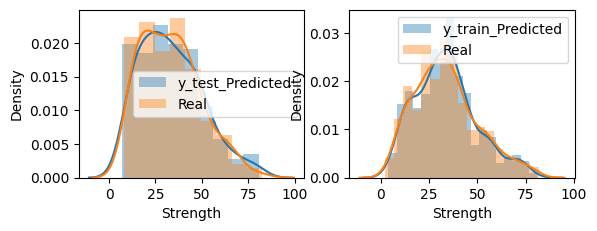

In [ ]:

plt.subplot(2,2,1)
sns.distplot(y_test_pred,label="y_test_Predicted")
sns.distplot(y_test,label="Real")
plt.legend()

plt.subplot(2,2,2)
sns.distplot(y_train_pred,label="y_train_Predicted")
sns.distplot(y_train,label="Real")
plt.legend()

MAE

In [ ]:
lr_mae=mean_absolute_error(y_test,y_test_pred)
lr_mse

4.789953692212775

In [ ]:
lr.score(x_train,y_train)

0.9299387046208738

In [ ]:
lr_score=lr.score(x_test,y_test)
lr_score

0.8425625047583661

More Model Implementation

In [ ]:
ls=Lasso()
rd=Ridge()

ls = ls.fit(x_train,y_train)
rd = rd.fit(x_train,y_train)

y_test_pred_ls=ls.predict(x_test)
y_test_pred_rd=rd.predict(x_test)

MAE and Score for Lesso()

In [ ]:
ls_mae=mean_absolute_error(y_test,y_test_pred_ls)

In [ ]:
ls_score=ls.score(x_test,y_test)

MAE and Score for Ridge()

In [ ]:
rd_mae=mean_absolute_error(y_test,y_test_pred_rd)

In [ ]:
rd_score=rd.score(x_test,y_test)

Compare three  Models

<ipython-input-51-063eba3d933c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred,label="y_test Predicted in LinearRegression")
<ipython-input-51-063eba3d933c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Real")
<ipython-input-51-063eba3d933c>:7: UserWarning: 

`dist

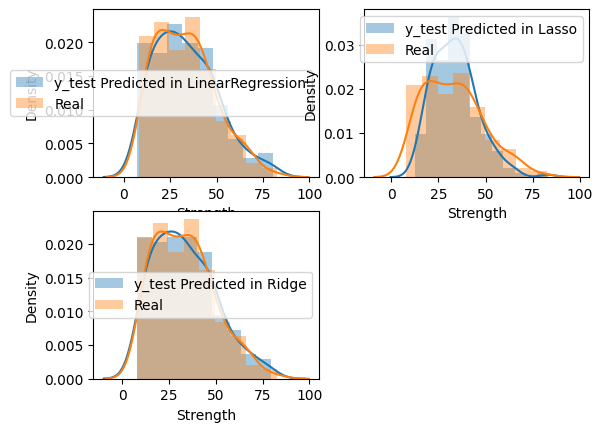

In [ ]:

plt.subplot(2,2,1)
sns.distplot(y_test_pred,label="y_test Predicted in LinearRegression")
sns.distplot(y_test,label="Real")
plt.legend()

plt.subplot(2,2,2)
sns.distplot(y_test_pred_ls,label="y_test Predicted in Lasso")
sns.distplot(y_test,label="Real")
plt.legend()

plt.subplot(2,2,3)
sns.distplot(y_test_pred_rd,label="y_test Predicted in Ridge")
sns.distplot(y_test,label="Real")
plt.legend()

In [ ]:
print('LinearRegression \nMAE : {} , score : {}'.format(lr_mae,lr_score))
print('Lesso \nMAE : {} , score : {}'.format(ls_mae,ls_score))
print('Ridge \nMAE : {} , score : {}'.format(rd_mae,rd_score))

LinearRegression 
MAE : 4.789953692212775 , score : 0.8425625047583661
Lesso 
MAE : 5.624683233801824 , score : 0.8015901353179202
Ridge 
MAE : 4.652642338776083 , score : 0.852874431088044
